In [1]:
import numpy as np
from scipy import ndimage
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [2]:
def gaussian_kernel(size, sigma=10):
    size = int(size) // 2
    x, y = np.mgrid[-size:size+1, -size:size+1]
    normal = 1 / (2.0 * np.pi * sigma**2)
    g =  np.exp(-((x**2 + y**2) / (2.0*sigma**2))) * normal
    return g

In [3]:
def sobel_filters(img):
    Kx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], np.float32)
    Ky = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]], np.float32)
    
    Ix = ndimage.filters.convolve(img, Kx)
    Iy = ndimage.filters.convolve(img, Ky)
    
    G = np.hypot(Ix, Iy)
    G = G / G.max() * 255
    theta = np.arctan2(Iy, Ix)
    
    return (G, theta)

In [4]:
def visualize(img,dst):
    plt.subplot(121),plt.imshow(img),plt.title('Original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(dst,cmap="gray"),plt.title('Blurred')
    plt.xticks([]), plt.yticks([])
    plt.show()

#### Canny Detector

In [5]:
def Canny_detector(img):
    weak_th = None 
    strong_th = None
    # conversion of image to grayscale
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
       
    # Noise reduction step
    g=gaussian_kernel(5,5)
    
    img= cv2.filter2D(src=img, kernel=g, ddepth=19)

    mag,ang=sobel_filters(img)
       
    # setting the minimum and maximum thresholds 
    # for double thresholding
    mag_max = np.max(mag)
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5
      
    # getting the dimensions of the input image  
    height, width = img.shape
       
    # Looping through every pixel of the grayscale 
    # image
    for i_x in range(width):
        for i_y in range(height):
               
            grad_ang = ang[i_y, i_x]
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)
               
            # selecting the neighbours of the target pixel
            # according to the gradient direction
            # In the x axis direction
            if grad_ang<= 22.5:
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
              
            # top right (diagonal-1) direction
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45):
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
              
            # In y-axis direction
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90):
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
              
            # top left (diagonal-2) direction
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135):
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
              
            # Now it restarts the cycle
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180):
                neighb_1_x, neighb_1_y = i_x-1, i_y
                neighb_2_x, neighb_2_y = i_x + 1, i_y
               
            # Non-maximum suppression step
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0:
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0:
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
                    mag[i_y, i_x]= 0
   
    weak_ids = np.zeros_like(img)
    strong_ids = np.zeros_like(img)              
    ids = np.zeros_like(img)
    # double thresholding step
    for i_x in range(width):
        for i_y in range(height):
              
            grad_mag = mag[i_y, i_x]
              
            if grad_mag<weak_th:
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th:
                ids[i_y, i_x]= 1
            else:
                ids[i_y, i_x]= 2
       
       
    # finally returning the magnitude of
    # gradients of edges
    return mag


C:\Users\irava\AppData\Local\Temp\ipykernel_39748\65442114.py:5: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Ix = ndimage.filters.convolve(img, Kx)
C:\Users\irava\AppData\Local\Temp\ipykernel_39748\65442114.py:6: DeprecationWarning: Please use `convolve` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Iy = ndimage.filters.convolve(img, Ky)


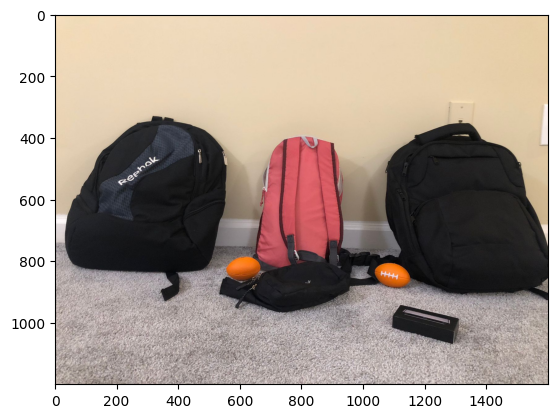

In [6]:
frame = cv2.imread('sample.jpeg')
canny_img = Canny_detector(frame)
   
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))


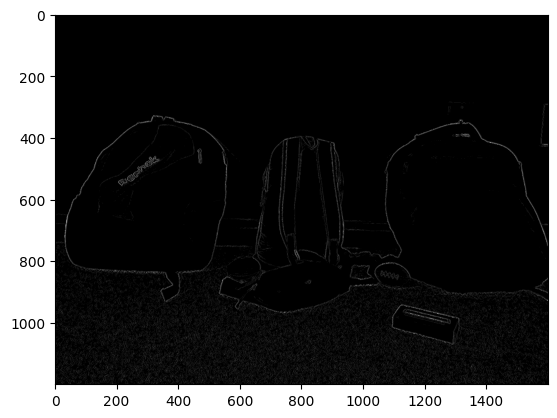

In [7]:
plt.imshow(canny_img,cmap='gray')

In [8]:
cv2.imwrite("canny_img.jpg",canny_img)

True

### Harris Edge Detection

array([[[192, 223, 248],
        [191, 222, 247],
        [191, 222, 247],
        ...,
        [165, 205, 230],
        [165, 205, 230],
        [165, 205, 230]],

       [[191, 222, 247],
        [191, 222, 247],
        [191, 222, 247],
        ...,
        [165, 205, 230],
        [165, 205, 230],
        [165, 205, 230]],

       [[190, 221, 246],
        [190, 221, 246],
        [190, 221, 246],
        ...,
        [166, 206, 231],
        [166, 206, 231],
        [166, 206, 231]],

       ...,

       [[145, 152, 169],
        [153, 160, 177],
        [160, 167, 184],
        ...,
        [160, 170, 180],
        [151, 161, 171],
        [152, 162, 172]],

       [[156, 163, 180],
        [163, 170, 187],
        [167, 174, 191],
        ...,
        [159, 169, 179],
        [151, 161, 171],
        [148, 158, 168]],

       [[162, 169, 186],
        [171, 178, 195],
        [178, 185, 202],
        ...,
        [164, 174, 184],
        [160, 170, 180],
        [150, 160, 170]]

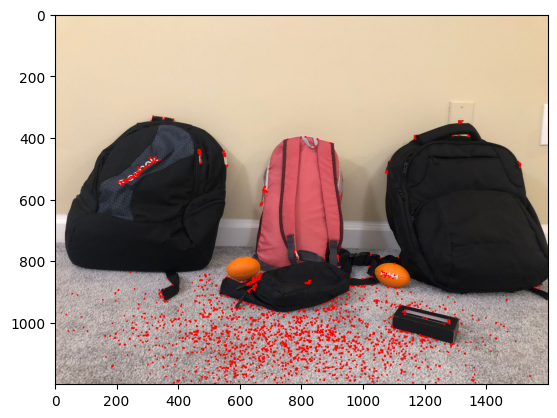

In [9]:
image = frame
operatedImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
operatedImage = np.float32(operatedImage)
dest = cv2.cornerHarris(operatedImage, 2, 3, 0.07)
dest = cv2.dilate(dest,gaussian_kernel(5,5))
image[dest > 0.01 * dest.max()]=[0, 0, 255]
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
if cv2.waitKey(0) & 0xff == 27:
    cv2.destroyAllWindows()
image

In [10]:
cv2.imwrite("corner_image.jpg",image)

True

In [11]:
canny_img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
def integral_image(image, *, dtype=None):
    if dtype is None and image.real.dtype.kind == 'f':
        dtype = np.promote_types(image.dtype, np.float64)

    S = image
    for i in range(image.ndim):
        S = S.cumsum(axis=i, dtype=dtype)
    return S


def integrate(ii, start, end):
    start = np.atleast_2d(np.array(start))
    end = np.atleast_2d(np.array(end))
    rows = start.shape[0]

    total_shape = ii.shape
    total_shape = np.tile(total_shape, [rows, 1])

    start_negatives = start < 0
    end_negatives = end < 0
    start = (start + total_shape) * start_negatives + \
             start * ~(start_negatives)
    end = (end + total_shape) * end_negatives + \
           end * ~(end_negatives)

    if np.any((end - start) < 0):
        raise IndexError('end coordinates must be greater or equal to start')

    S = np.zeros(rows)
    bit_perm = 2 ** ii.ndim
    width = len(bin(bit_perm - 1)[2:])
    for i in range(bit_perm):  
        binary = bin(i)[2:].zfill(width)
        bool_mask = [bit == '1' for bit in binary]

        sign = (-1)**sum(bool_mask)

        bad = [np.any(((start[r] - 1) * bool_mask) < 0)
               for r in range(rows)]  

        corner_points = (end * (np.invert(bool_mask))) + \
                         ((start - 1) * bool_mask)

        S += [sign * ii[tuple(corner_points[r])] if(not bad[r]) else 0
              for r in range(rows)]
    return S

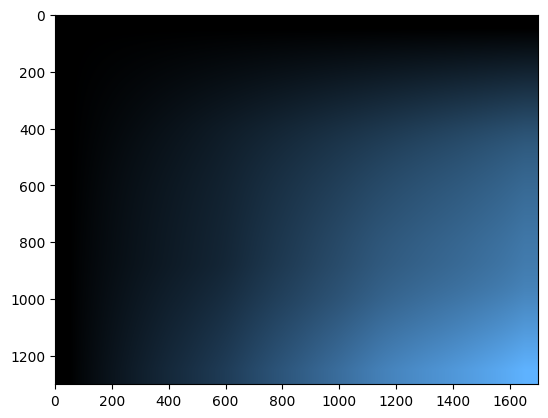

In [13]:
frame = cv2.imread('sample.jpeg')
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
frame= cv2.copyMakeBorder(frame, 50, 50, 50, 50, cv2.BORDER_CONSTANT, (0,0,0))
frame=integral_image(frame)
frame = frame/np.amax(frame)
frame = np.clip(frame, 0,255)
plt.imshow(frame)

### Image Stitching

In [14]:
class Image_Stitching():
    def __init__(self) :
        self.ratio=0.85
        self.min_match=10
        self.sift=cv2.SIFT_create()
        self.smoothing_window_size=800

    def registration(self,img1,img2):
        kp1, des1 = self.sift.detectAndCompute(img1, None)
        kp2, des2 = self.sift.detectAndCompute(img2, None)
        matcher = cv2.BFMatcher()
        raw_matches = matcher.knnMatch(des1, des2, k=2)
        good_points = []
        good_matches=[]
        for m1, m2 in raw_matches:
            if m1.distance < self.ratio * m2.distance:
                good_points.append((m1.trainIdx, m1.queryIdx))
                good_matches.append([m1])
        img3 = cv2.drawMatchesKnn(img1, kp1, img2, kp2, good_matches, None, flags=2)
        cv2.imwrite('matching.jpg', img3)
        if len(good_points) > self.min_match:
            image1_kp = np.float32(
                [kp1[i].pt for (_, i) in good_points])
            image2_kp = np.float32(
                [kp2[i].pt for (i, _) in good_points])
            H, status = cv2.findHomography(image2_kp, image1_kp, cv2.RANSAC,5.0)
        return H

    def create_mask(self,img1,img2,version):
        height_img1 = img1.shape[0]
        width_img1 = img1.shape[1]
        width_img2 = img2.shape[1]
        height_panorama = height_img1
        width_panorama = width_img1 +width_img2
        offset = int(self.smoothing_window_size / 2)
        barrier = img1.shape[1] - int(self.smoothing_window_size / 2)
        mask = np.zeros((height_panorama, width_panorama))
        if version== 'left_image':
            mask[:, barrier - offset:barrier + offset ] = np.tile(np.linspace(1, 0, 2 * offset ).T, (height_panorama, 1))
            mask[:, :barrier - offset] = 1
        else:
            mask[:, barrier - offset :barrier + offset ] = np.tile(np.linspace(0, 1, 2 * offset ).T, (height_panorama, 1))
            mask[:, barrier + offset:] = 1
        return cv2.merge([mask, mask, mask])

    def blending(self,img1,img2):
        H = self.registration(img1,img2)
        height_img1 = img1.shape[0]
        width_img1 = img1.shape[1]
        width_img2 = img2.shape[1]
        height_panorama = height_img1
        width_panorama = width_img1 +width_img2

        panorama1 = np.zeros((height_panorama, width_panorama, 3))
        mask1 = self.create_mask(img1,img2,version='left_image')
        panorama1[0:img1.shape[0], 0:img1.shape[1], :] = img1
        panorama1 *= mask1
        mask2 = self.create_mask(img1,img2,version='right_image')
        panorama2 = cv2.warpPerspective(img2, H, (width_panorama, height_panorama))*mask2
        result=panorama1+panorama2

        rows, cols = np.where(result[:, :, 0] != 0)
        min_row, max_row = min(rows), max(rows) + 1
        min_col, max_col = min(cols), max(cols) + 1
        final_result = result[min_row:max_row, min_col:max_col, :]
        return final_result



In [15]:
d='block1'
img1=cv2.cvtColor(cv2.imread(d+'/1.jpeg'), cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(cv2.imread(d+'/2.jpeg'), cv2.COLOR_BGR2RGB)
img3=cv2.cvtColor(cv2.imread(d+'/3.jpeg'), cv2.COLOR_BGR2RGB)


In [16]:
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch([img1,img2,img3])
print(status)

0


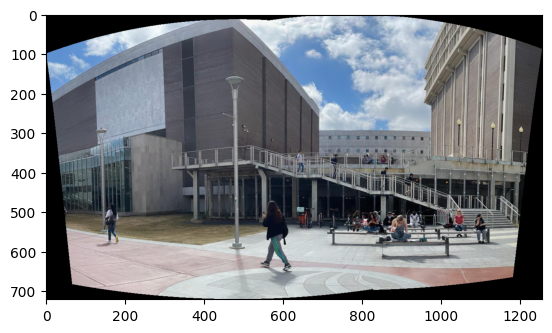

In [17]:
plt.imshow(stitched)

In [18]:
cv2.imwrite(d+'/f1.jpg',stitched)

True

In [19]:
d='block2'
img1=cv2.cvtColor(cv2.imread(d+'/1.jpg'), cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(cv2.imread(d+'/2.jpg'), cv2.COLOR_BGR2RGB)
img3=cv2.cvtColor(cv2.imread(d+'/3.jpg'), cv2.COLOR_BGR2RGB)

In [20]:
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch([img1,img2,img3])
print(status)

0


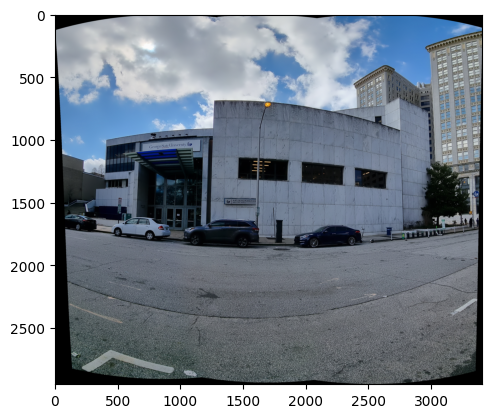

In [21]:
plt.imshow(stitched)

In [22]:
cv2.imwrite(d+'/f2.jpg',stitched)

True

In [23]:
d='block3'
img1=cv2.cvtColor(cv2.imread(d+'/1.jpeg'), cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(cv2.imread(d+'/2.jpeg'), cv2.COLOR_BGR2RGB)
img3=cv2.cvtColor(cv2.imread(d+'/3.jpeg'), cv2.COLOR_BGR2RGB)

In [24]:
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch([img1,img2,img3])
print(status)

0


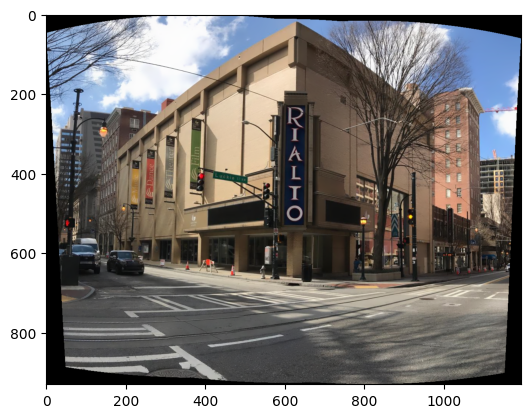

In [25]:
plt.imshow(stitched)



In [26]:
cv2.imwrite(d+'/f3.jpg',stitched)

True

In [27]:
d='block4'
img1=cv2.cvtColor(cv2.imread(d+'/1.jpeg'), cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(cv2.imread(d+'/2.jpeg'), cv2.COLOR_BGR2RGB)
img3=cv2.cvtColor(cv2.imread(d+'/3.jpeg'), cv2.COLOR_BGR2RGB)

In [28]:
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch([img1,img2,img3])
print(status)

0


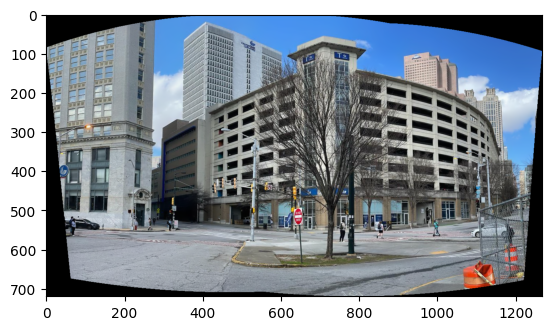

In [29]:
plt.imshow(stitched)


In [30]:
cv2.imwrite(d+'/f4.jpg',stitched)

True

In [31]:
d='block5'
img1=cv2.cvtColor(cv2.imread(d+'/1.jpg'), cv2.COLOR_BGR2RGB)
img2=cv2.cvtColor(cv2.imread(d+'/2.jpg'), cv2.COLOR_BGR2RGB)
img3=cv2.cvtColor(cv2.imread(d+'/3.jpg'), cv2.COLOR_BGR2RGB)

In [32]:
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch([img1,img2,img3])
print(status)

0


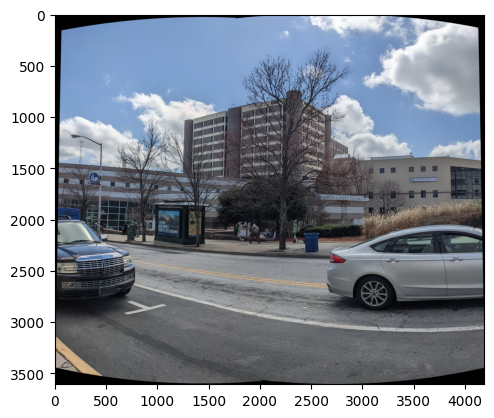

In [33]:
plt.imshow(stitched)

In [34]:
cv2.imwrite(d+'/f5.jpg',stitched)

True